In [1]:
import sys
import os

# # Simple approach: add the parent directory to Python path
# project_root = os.path.dirname(os.getcwd())
# sys.path.insert(0, project_root)
# print(f"Added {project_root} to Python path")
# print(f"Current working directory: {os.getcwd()}")

import pickle
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from functions_parameters.universal_parameters import a, b
from itertools import product

In [2]:
final_result = np.load('schf_filling_1_t_4_em4_random_basis_mesh_30_2_2.npz')


final_ground_state_e_diff_density = final_result['gse']
final_density = final_result['d']
final_bond = final_result['bond']
final_e_difference = final_result['e_diff']
final_c_difference = final_result['c_diff']
final_e_fermi = final_result['e_fermi']
final_iteration = final_result['iters']
any_bi_fail = final_result['any_bi_fail']

u_arr = final_result['u']
v1_arr = u_arr
u_mesh, v1_mesh = np.meshgrid(u_arr, v1_arr, indexing = 'ij')

In [3]:
np.max(final_c_difference)

np.float64(0.27036397146942376)

In [4]:
np.max(final_e_difference)

np.float64(0.000415690235393118)

### Some points do not converge

In [5]:
index_c_diff = np.where(np.abs(final_c_difference)>1E-4)
final_ground_state_e_diff_density[index_c_diff] = 0
index_e_diff = np.where(np.abs(final_e_difference)>1E-4)
final_ground_state_e_diff_density[index_e_diff] = 0

In [6]:
index_c_diff

(array([ 1,  7,  7,  7,  8, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
        12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15,
        15, 15, 15, 15, 15, 15, 15]),
 array([ 7,  5,  6, 11, 11, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5, 14,  0,
         0,  0,  0,  0,  0, 14, 14]),
 array([17,  0, 17, 11, 18, 11, 18,  0,  1,  2,  3,  4,  5,  0,  1,  2,  3,
         4,  5,  0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5,  4,  6,  0,
         1,  2,  3,  4,  5,  6, 13]))

In [7]:
final_c_difference[index_c_diff]

array([3.78184866e-03, 6.64735292e-04, 1.16085110e-04, 1.50844889e-04,
       6.82389017e-04, 5.31992901e-04, 1.06712747e-04, 5.35699991e-02,
       5.35699990e-02, 5.33934930e-02, 1.04420825e-01, 1.04420825e-01,
       1.04420825e-01, 1.40412426e-01, 1.40412426e-01, 1.40412426e-01,
       1.40412426e-01, 1.40412426e-01, 1.40412426e-01, 1.68546697e-01,
       1.68546697e-01, 1.68546697e-01, 1.68546703e-01, 1.68546697e-01,
       1.68546697e-01, 2.63670590e-01, 2.63670590e-01, 2.63670590e-01,
       2.63670590e-01, 2.63670590e-01, 2.63670590e-01, 2.04270146e-04,
       5.09881124e-04, 2.70363971e-01, 2.70363971e-01, 2.70363971e-01,
       2.70363971e-01, 2.70363971e-01, 2.70363971e-01, 2.38719118e-04,
       4.23782201e-04])

### Phase Analysis

In [8]:
from functions_parameters.tools import rot_symm_m_check_d, translation_check_d
from functions_parameters.universal_parameters import pauli_matrices

translation_a1 = np.kron(np.array([[0,0,1,0],
                           [0,0,0,1],
                           [1,0,0,0],
                           [0,1,0,0]]), np.eye(3))
translation_a2 = np.kron(np.array([[0,1,0,0],
                           [1,0,0,0],
                           [0,0,0,1],
                           [0,0,1,0]]), np.eye(3))
c_6_uc = np.array([[0,0,1],
                   [1,0,0],
                   [0,1,0]])
c_3_uc = c_6_uc@c_6_uc
c_2_uc = c_6_uc @ c_3_uc
c_6_2uc = np.zeros((12, 12))
c_6_2uc[0, 2] = 1
c_6_2uc[1, 6] = 1
c_6_2uc[2, 7] = 1
c_6_2uc[3, 8] = 1
c_6_2uc[4, 0] = 1
c_6_2uc[5, 1] = 1
c_6_2uc[6, -1] = 1
c_6_2uc[7, 3] = 1
c_6_2uc[8, 4] = 1
c_6_2uc[9, 5] = 1
c_6_2uc[10, -3] = 1
c_6_2uc[11, -2] = 1

c_6_2uc = np.moveaxis(np.reshape(c_6_2uc, (2, 2, 3, 2, 2, 3)), (0, 3), (1, 4)).reshape(12, 12)
c_3_2uc = c_6_2uc @ c_6_2uc
c_2_2uc = c_3_2uc @ c_6_2uc

In [9]:
ts_charge_test_phase = ['', '1*2 CDW', '2*2 CDW']
ts_m_test_phase = [' ', ' 1*2 SDW', ' 2*2 SDW']
nematic_phase = [' R symmetric', ' C3 charge nematic', ' C2 charge nematic', ' no R']
Magnetism_phase = [' +', ' FM', ' Ferri', ' AFM']

phase_list_final = list(i+j+m+n for i,j,m,n in product(ts_charge_test_phase, ts_m_test_phase, nematic_phase, Magnetism_phase))

In [10]:
sorted_ground_state_e_index = np.argsort(final_ground_state_e_diff_density, axis=2)
sorted_ground_state_e= np.take_along_axis(final_ground_state_e_diff_density, sorted_ground_state_e_index, axis=2)
sorted_density = np.take_along_axis(final_density, sorted_ground_state_e_index[:,:,:,np.newaxis,np.newaxis], axis=2)
sorted_e_difference = np.take_along_axis(final_e_difference, sorted_ground_state_e_index, axis=2)
sorted_c_difference = np.take_along_axis(final_c_difference, sorted_ground_state_e_index, axis=2)

In [11]:
phase_diagram_based_on_d = np.zeros((u_mesh.shape))

threshold = 1E-3
for i in range(u_mesh.shape[0]):
    for j in range(u_mesh.shape[1]):
        d_ij = sorted_density[i,j,0]
        ts_recording_c = np.zeros((3))
        ts_recording_s = np.zeros((3))
        rs_recording = np.zeros((4))
        m_recording = np.zeros((4))
        translation_a1_diff_c, translation_a2_diff_c, translation_a1_diff_m, translation_a2_diff_m = translation_check_d(d_ij, translation_a1, translation_a2)
        if translation_a1_diff_c<threshold and translation_a2_diff_c<threshold:
            ts_recording_c[0] = 1
        elif translation_a1_diff_c>threshold and translation_a2_diff_c>threshold:
            ts_recording_c[-1] = 1
        else:
            ts_recording_c[1] = 1
        if translation_a1_diff_m<threshold and translation_a2_diff_m<threshold:
            ts_recording_s[0] = 1
        elif translation_a1_diff_m>threshold and translation_a2_diff_m>threshold:
            ts_recording_s[-1] = 1
        else:
            ts_recording_s[1] = 1
        if ts_recording_c[0]+ts_recording_s[0]>1.5:
            d_ij = d_ij[:,:3]
            c6_diff, c3_diff, c2_diff, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_uc, c_3_uc, c_2_uc)
        else:
            c6_diff, c3_diff, c2_diff, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_2uc, c_3_2uc, c_2_2uc)
        if c6_diff<threshold:
            rs_recording[0] = 1
        elif c6_diff>threshold and c3_diff<threshold:
            rs_recording[1] = 1
        elif c2_diff<threshold and c6_diff>threshold:
            rs_recording[2] = 1
        else:
            rs_recording[3] = 1
        if np.max(np.abs(magnetism_arr)) > threshold:
            if np.all(np.sign(np.real(magnetism_arr)) == 1) or np.all(np.sign(np.real(magnetism_arr)) == -1):
                m_recording[1] = 1
            else:
                net_m = np.sum(np.real(magnetism_arr))
                if np.abs(net_m) <= threshold:
                    m_recording[3] = 1
                else:
                    m_recording[2] = 1
        else:
            m_recording[0] = 1
        phase_arr = np.kron(ts_recording_c,ts_recording_s)
        phase_arr = np.kron(phase_arr,rs_recording)
        phase_arr = np.kron(phase_arr,m_recording)
        phase = np.where(phase_arr>0.5)[0][0]
        
        phase_diagram_based_on_d[i,j]=phase

Text(0.5, 1.0, 'filling = 1')

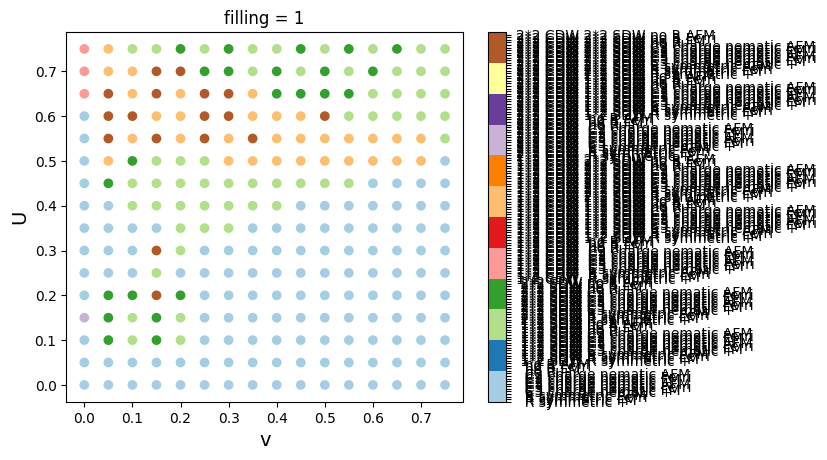

In [12]:
colorbar_ticks_combined = np.arange(len(phase_list_final))
cmap = plt.get_cmap("Paired", len(phase_list_final))
# plt.pcolormesh(e_fermi_mesh, u_mesh, phase_diagram_combined_op.T, cmap="Paired")
plt.scatter(u_mesh, v1_mesh, c=phase_diagram_based_on_d, cmap=cmap,vmin=0, vmax=len(phase_list_final))
# plt.xlabel(r'$E_{f}$', size = '14')
plt.xlabel('v', size = '14')
plt.ylabel('U', size = '14')
# plt.xlim(3.8,6)
colorbar_ticks = np.arange(len(phase_list_final))
cbar = plt.colorbar()
cbar.set_ticks(colorbar_ticks)
cbar.set_ticklabels(phase_list_final)
plt.title('filling = 1')

In [13]:
unique_phase_index = np.unique(phase_diagram_based_on_d)
unique_phase_name = [phase_list_final[i] for i in np.int_(unique_phase_index)]
filtered_phase_diagram = np.zeros(phase_diagram_based_on_d.shape)
for i in range(u_mesh.shape[0]):
    for j in range(u_mesh.shape[1]):
        filtered_phase_diagram[i,j] = np.where(unique_phase_index==phase_diagram_based_on_d[i,j])[0][0]

Text(0.5, 1.0, 'filling = 1')

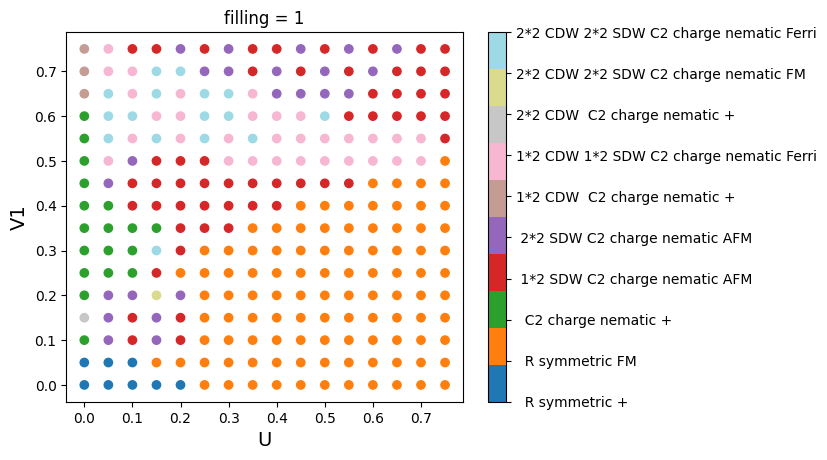

In [14]:
cmap = plt.get_cmap("tab20", len(unique_phase_index))
plt.scatter(u_mesh, v1_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('U', size = '14')
plt.ylabel('V1', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 1')

Text(0.5, 1.0, 'filling = 1')

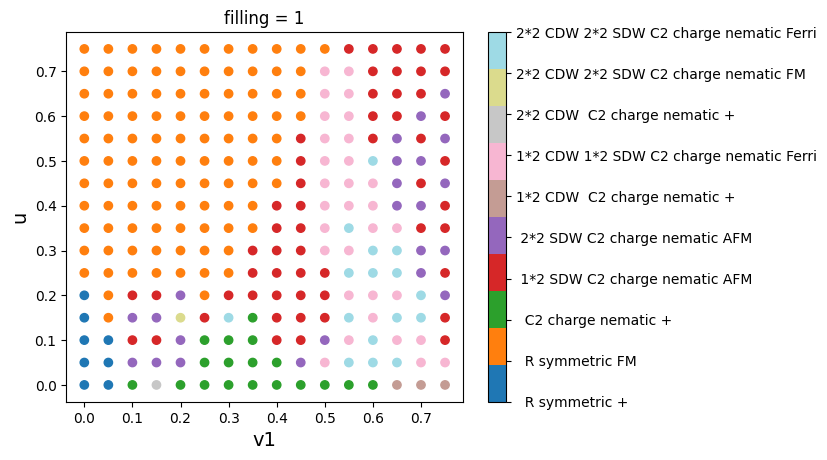

In [15]:
cmap = plt.get_cmap("tab20", len(unique_phase_index))
plt.scatter(v1_mesh, u_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('v1', size = '14')
plt.ylabel('u', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 1')

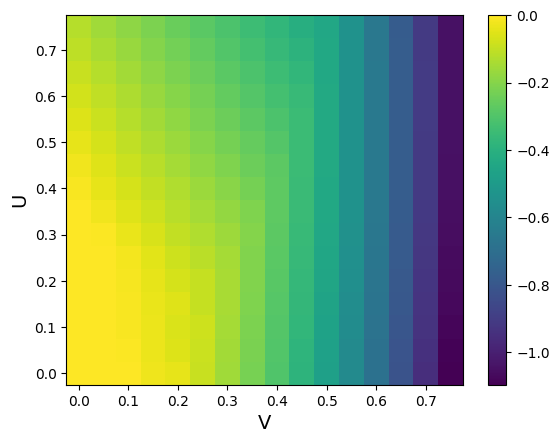

In [16]:
plt.pcolormesh(v1_mesh,u_mesh,sorted_ground_state_e[:,:,0])
plt.xlabel('V', size = '14')
plt.ylabel('U', size = '14')
plt.colorbar()

In [17]:
np.mean(final_iteration)

np.float64(103.2494140625)

In [18]:
np.max(final_iteration)

np.int32(500)

In [19]:
np.min(final_iteration)

np.int32(2)